In [1]:
import tensorflow as tf

2025-07-24 18:44:54.638331: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-24 18:44:54.649348: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-24 18:44:54.722970: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-24 18:44:54.790275: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753370094.850324    6606 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753370094.86

In [132]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [133]:
data_directory = './data/'

In [134]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.1,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8,1.2]
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train = train_datagen.flow_from_directory(
    data_directory + 'train',
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary'
)

validation = val_datagen.flow_from_directory(
    data_directory + 'validation',
    target_size=(256, 256),
    batch_size=256,
    class_mode='binary'
)
test = test_datagen.flow_from_directory(
    data_directory + 'test',
    target_size=(256, 256),
    batch_size=256,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [145]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout, BatchNormalization

In [146]:
model = Sequential()

In [147]:
model.add(Input(shape=(256, 256, 3)))
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [1]:
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=Optimizer, loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

NameError: name 'model' is not defined

In [149]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 252, 252, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │     3,211,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,601,345 (13.74 MB)

 Trainable params: 3,601,345 (13.74 MB)

 Non-trainable params: 0 (0.00 B)

# train

In [150]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=validation, callbacks=[tensorboard_callback])

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 60s 936ms/step - accuracy: 0.5069 - loss: 0.7231 - val_accuracy: 0.5030 - val_loss: 0.6960
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.5226 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.5128 - loss: 0.6920 - val_accuracy: 0.5920 - val_loss: 0.6919
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.4971 - loss: 0.6973 - val_accuracy: 0.5690 - val_loss: 0.6870
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 61s 971ms/step - accuracy: 0.5489 - loss: 0.6901 - val_accuracy: 0.5620 - val_loss: 0.6854
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 61s 969ms/step - accuracy: 0.5701 - loss: 0.6899 - val_accuracy: 0.5460 - val_loss: 0.6861
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 61s 973ms/step - accuracy: 0.5329 - loss: 0.6864 - val_accuracy: 0.5300 - val_loss: 0.6907
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 62s 986ms/step - accuracy: 0.5341 - loss: 0.6893 - val_accuracy: 0.5

KeyboardInterrupt: 

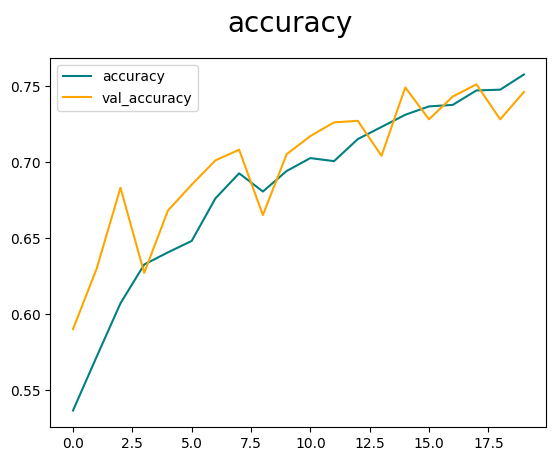

In [129]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


# test model

In [130]:
test_loss, test_accuracy = model.evaluate(test)
print(test_accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.7317 - loss: 0.5297
0.7524999976158142
